In [44]:
# import library
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

import matplotlib.pyplot as plt

Download the data:
- spike times and stimulus index from https://amubox.univ-amu.fr/s/cB4sEsFTwQYxBJ6
- labels from https://amubox.univ-amu.fr/s/d5zzCWJZ6aPnmqi

In [76]:
data_tmp = np.load('ex_spikes.npz')['spk']

# stimulus time
stim_time = data_tmp[:,0]

# unit id
unit_id = np.array(data_tmp[:,1], dtype=int)

# spike time
spike_time = data_tmp[:,2] * pq.s

In [77]:
# get id and number of units
ind_unit_nrn = np.sort(np.unique(unit_id))
n_nrn = ind_unit_nrn.size

# show index correspondance between units and nrn (0..n_nrn)
ind_unit_nrn = np.vstack((ind_unit_nrn, np.arange(n_nrn)))

# change for categorical variables
nrn_id = np.zeros(unit_id.shape, dtype=int)
for i in range(n_nrn):
    j = ind_unit_nrn[0,i]
    nrn_id[unit_id==j] = i

# check
print('number of (putative) neurons:', n_nrn)
print(np.unique(nrn_id))

number of (putative) neurons: 93
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]


In [78]:
# get id and number of stimuli
ind_stim_trial = np.unique(stim_time)
n_trial = ind_stim_trial.size

# show index correspondance between stim and trial (0..n_trial)
ind_stim_trial = np.vstack((ind_stim_trial, np.arange(n_trial)))

# change for categorical variables
trial_id = np.zeros(stim_time.shape, dtype=int)
for i in range(n_trial):
    j = ind_stim_trial[0,i]
    trial_id[stim_time==j] = i

# check
print('number of trials:', n_trial)
print(np.unique(trial_id))

number of trials: 5950
[   0    1    2 ... 5947 5948 5949]


Save in NEO format for SPADE

In [61]:
# start/stop times of trials
t_start = 0.0*pq.s
t_stop = 2.51*pq.s

# gather all groups in a list
group_list = []

print('takes some time...')
# gather the spike train of each neuron for all trials 
for i_trial in range(n_trial):
    print(i_trial, '/', n_trial)
    # group of spike trains for each trial
    gp = []
    for i_nrn in range(n_nrn):
        # get spike times for trial and neuron
        select_ind = np.logical_and(trial_id==i_trial, nrn_id==i_nrn)
        spike_time_tmp = spike_time[select_ind]
        # create NEO object and append 
        spk_trn = neo.SpikeTrain(spike_time_tmp, t_start=t_start, t_stop=t_stop)
        gp += [spk_trn]
    # add group to the global list
    group_list += [gp]


takes some time...
0 / 5950
1 / 5950
2 / 5950
3 / 5950
4 / 5950
5 / 5950
6 / 5950
7 / 5950
8 / 5950
9 / 5950
10 / 5950
11 / 5950
12 / 5950
13 / 5950
14 / 5950
15 / 5950
16 / 5950
17 / 5950


KeyboardInterrupt: 

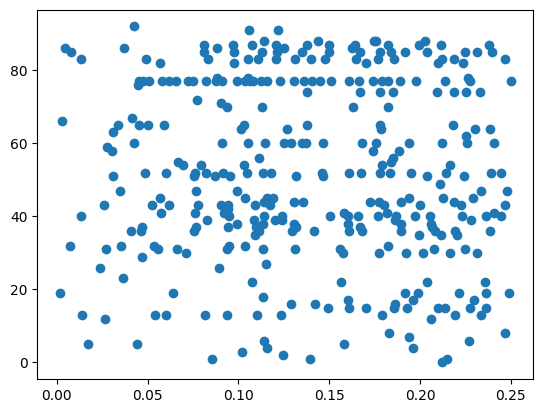

In [54]:
# plot first trial

select_ind = trial_id==0

plt.scatter(spike_time[select_ind], nrn_id[select_ind])

In [79]:
data_tmp = np.load('labels.npz', allow_pickle=True)['labels']

# check that the label number matches the stimuli number
assert n_trial==data_tmp.size

# transform labels in integers
labels = np.array(data_tmp, dtype=int)

print(labels)

[14  0  8 ... 73 95 95]


Save in NEO format for SPADE

In [90]:
# chosen label
chosen_label = 0
# select all trials for chosen label
sel_trial = labels==chosen_label

# max time when concatenating all trials
t_stop_all = t_stop * sel_trial.sum()

# concatenate spike trains of each neuron for all trials 
gp = []
# loop over neurons
for i_nrn in range(n_nrn):
    print('neuron', i_nrn, '/', n_nrn)
    # incremental start time to concatenate the trials
    trial_start_time = 0.0*pq.s
    # array to gather all spike times
    spike_time_all = neo.SpikeTrain(np.array([])*pq.s, t_start, t_stop_all)
    # loop over trials
    for i_trial in np.arange(n_trial)[sel_trial]:
        # print(i_trial, '/', n_trial)
        # get spike times for trial and neuron
        select_ind = np.logical_and(trial_id==i_trial, nrn_id==i_nrn)
        spike_time_tmp = np.array(spike_time[select_ind])
        # add trial start time
        spike_time_tmp += trial_start_time
        spike_time_all = np.concatenate((spike_time_all, spike_time_tmp))
        # increment start time
        trial_start_time += t_stop
    # create NEO object and append 
    gp += [spike_time_all]


neuron 0 / 93
neuron 1 / 93
neuron 2 / 93
neuron 3 / 93
neuron 4 / 93
neuron 5 / 93
neuron 6 / 93
neuron 7 / 93
neuron 8 / 93
neuron 9 / 93
neuron 10 / 93
neuron 11 / 93
neuron 12 / 93
neuron 13 / 93
neuron 14 / 93
neuron 15 / 93
neuron 16 / 93
neuron 17 / 93
neuron 18 / 93
neuron 19 / 93
neuron 20 / 93
neuron 21 / 93
neuron 22 / 93
neuron 23 / 93
neuron 24 / 93
neuron 25 / 93
neuron 26 / 93
neuron 27 / 93
neuron 28 / 93
neuron 29 / 93
neuron 30 / 93
neuron 31 / 93
neuron 32 / 93
neuron 33 / 93
neuron 34 / 93
neuron 35 / 93
neuron 36 / 93
neuron 37 / 93
neuron 38 / 93
neuron 39 / 93
neuron 40 / 93
neuron 41 / 93
neuron 42 / 93
neuron 43 / 93
neuron 44 / 93
neuron 45 / 93
neuron 46 / 93
neuron 47 / 93
neuron 48 / 93
neuron 49 / 93
neuron 50 / 93
neuron 51 / 93
neuron 52 / 93
neuron 53 / 93
neuron 54 / 93
neuron 55 / 93
neuron 56 / 93
neuron 57 / 93
neuron 58 / 93
neuron 59 / 93
neuron 60 / 93
neuron 61 / 93
neuron 62 / 93
neuron 63 / 93
neuron 64 / 93
neuron 65 / 93
neuron 66 / 93
neuro

Text(0, 0.5, 'neuron index')

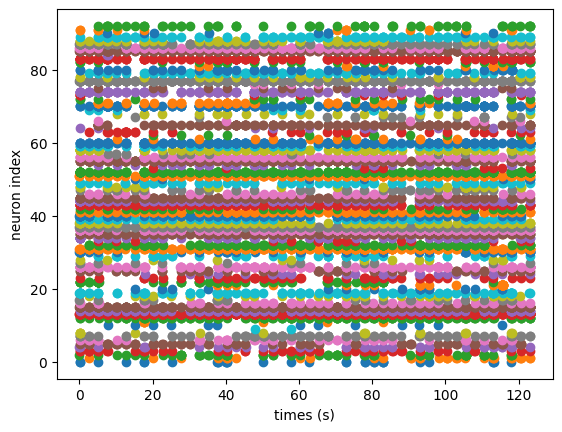

In [92]:
plt.figure()

for i_nrn in range(n_nrn):
    # get spike times to plot
    times_tmp = gp[i_nrn].times
    plt.scatter(times_tmp, [i_nrn]*times_tmp.size)
plt.xlabel('times (s)')
plt.ylabel('neuron index')
plt.show()